##Start by cleaning the data.
#    Identify any null or missing data, and impute appropriate replacement values.
 #   Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
  #  Explore the cleaned data.
   # View summary statistics for the numeric fields in the dataset.
    # Determine the distribution of the DepDelay and ArrDelay columns.
    # Use statistics, aggregate functions, and visualizations to answer the following questions:
    # What are the average (mean) departure and arrival delays?
    #How do the carriers compare in terms of arrival delay performance?
    #Is there a noticable difference in arrival delays for different days of the week?
    #Which departure airport has the highest average departure delay?
    #Do late departures tend to result in longer arrival delays than on-time departures?
    #Which route (from origin airport to destination airport) has the most late arrivals?
    #Which route has the highest average arrival delay?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df_fly = pd.read_csv("flights.csv")

df_fly.head()

##Start by cleaning the data.
#    Identify any null or missing data, and impute appropriate replacement values.
 #   Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
  #  Explore the cleaned data.
   # View summary statistics for the numeric fields in the dataset.
    #Determine the distribution of the DepDelay and ArrDelay columns.
    #Use statistics, aggregate functions, and visualizations to answer the following questions:
    #What are the average (mean) departure and arrival delays?
    #How do the carriers compare in terms of arrival delay performance?
    #Is there a noticable difference in arrival delays for different days of the week?
    #Which departure airport has the highest average departure delay?
    #Do late departures tend to result in longer arrival delays than on-time departures?
    #Which route (from origin airport to destination airport) has the most late arrivals?
    #Which route has the highest average arrival delay?

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [3]:
print(df_fly.isnull().sum())
print(df_fly.info())
print()
print(df_fly.shape)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAi

In [4]:
df_fly.ArrDel15.value_counts()

0    213220
1     58720
Name: ArrDel15, dtype: int64

In [5]:
df_fly.DepDel15.value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

In [6]:
df_flym = df_fly.copy()

In [7]:
df_flym

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [8]:
df_flym[df_flym.DepDel15.isnull()].DepDelay.value_counts()

0    2761
Name: DepDelay, dtype: int64

In [9]:
df_flym[df_flym.DepDel15.isnull()][["DepDel15", "DepDelay"]]

,DepDel15,DepDelay
171,NaN,0
359,NaN,0
429,NaN,0
545,NaN,0
554,NaN,0
...,...,...
271410,NaN,0
271607,NaN,0
271634,NaN,0
271671,NaN,0


Viendo que el valor del tiempo de delay de los vuelos que no tienen informacion de confirmación si salieron tarde o no es 0 para todos, procedemos a rellenar los datos nulos de confirmación de salida tardía como 0

In [10]:
df_flym.DepDel15.fillna(value= 0.0, inplace = True)

In [11]:
df_flym.DepDel15.astype("int64")

0         0
1         0
2         0
3         1
4         0
         ..
271935    0
271936    1
271937    1
271938    0
271939    1
Name: DepDel15, Length: 271940, dtype: int64

In [12]:
df_flym.DepDel15.value_counts()

0.0    217799
1.0     54141
Name: DepDel15, dtype: int64

In [13]:
df_flym[df_flym.Cancelled == 1]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
145,2013,9,12,4,MQ,11066,Port Columbus International,Columbus,OH,12478,John F. Kennedy International,New York,NY,1320,1,0.0,1515,0,1,1
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,0.0,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,0.0,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,0.0,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,0.0,809,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,0.0,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,0.0,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,0.0,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,0.0,1540,0,1,1


Viendo que hay valores de delay en vuelos cancelados, para no producir un sesgo homogenizamos los datos haciendo que ni salieron tarde, ni llegaron tarde pues fueron cancelados.

In [14]:
df_flym.loc[df_flym.Cancelled == 1, "ArrDel15"] = 0
df_flym.loc[df_flym.Cancelled == 1, "ArrDelay"] = 0
df_flym.loc[df_flym.Cancelled == 1, "DepDelay"] = 0
df_flym.loc[df_flym.Cancelled == 1, "DepDel15"] = 0

In [15]:
df_flym[df_flym.Cancelled == 1]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
145,2013,9,12,4,MQ,11066,Port Columbus International,Columbus,OH,12478,John F. Kennedy International,New York,NY,1320,0,0.0,1515,0,0,1
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,0.0,945,0,0,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,0.0,1738,0,0,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,0.0,2125,0,0,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,0.0,809,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,0.0,1625,0,0,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,0.0,729,0,0,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,0.0,1745,0,0,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,0.0,1540,0,0,1


In [16]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (12,8))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

Minimum:-63.00
Mean:10.32
Median:-1.00
Mode:-3.00
Maximum:1425.00



C:\Users\ibayl\AppData\Local\Temp/ipykernel_14204/3170600929.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


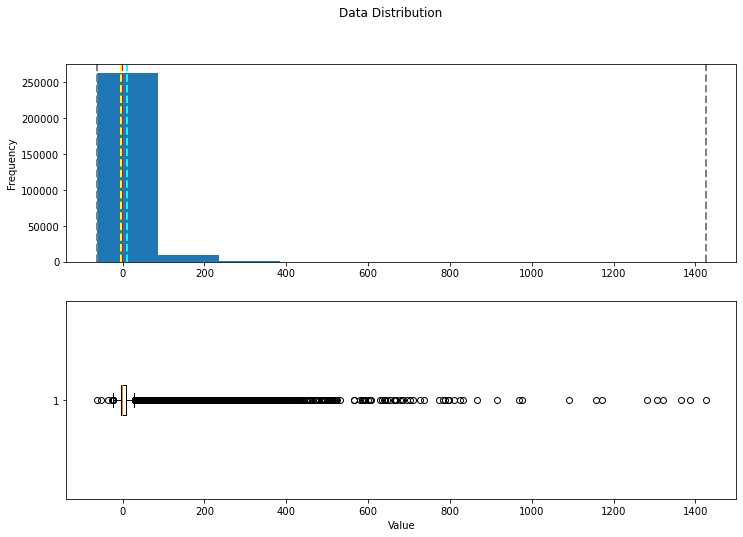

In [17]:
show_distribution(df_flym.DepDelay)

In [18]:
def OutOutliers(data):

    #Rango intercuartil para marcar las fronteras de los outliers
    q75, q25 = np.quantile(data, [0.75, 0.25])
    iqr = q75 - q25
    iqr

    #Límite superior
    LimSup = data.quantile(0.75)+(1.5*iqr)

    #Límite inferior
    LimInf = data.quantile(0.25)-(1.5*iqr)

    print("Límite Superior: {:.2f}\nLímite Inferior: {:.2f}\n" .format(LimSup, LimInf))

In [19]:
OutOutliers(df_flym.DepDelay)


Límite Superior: 28.50
Límite Inferior: -23.50



In [20]:
OutOutliers(df_flym.ArrDelay)

Límite Superior: 41.50
Límite Inferior: -42.50



In [21]:
df_flyt = df_flym.copy()
df_flyt

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [22]:
df_flyt = df_flyt[(df_flyt.DepDelay <= 28.5) & (df_flyt.DepDelay >= -23.5) & (df_flyt.ArrDelay <= 41.5) & (df_flyt.ArrDelay >= -42.5)]

In [23]:
df_flyt.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,235137.0,235137.000000,235137.000000,235137.000000,235137.000000,235137.000000,235137.000000,235137.00000,235137.000000,235137.000000,235137.000000,235137.000000,235137.000000
mean,2013.0,7.017921,15.801082,3.903410,12755.210681,12736.457027,1293.583592,0.37277,0.081416,1475.803646,-4.028643,0.087638,0.012401
std,0.0,2.003094,8.849536,1.996201,1507.660854,1504.487897,470.110780,8.02678,0.273474,488.178055,12.957970,0.282769,0.110669
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-23.00000,0.000000,1.000000,-42.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.00000,0.000000,1101.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1250.000000,-2.00000,0.000000,1458.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,3.00000,0.000000,1858.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,28.00000,1.000000,2359.000000,41.000000,1.000000,1.000000


In [26]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,6))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

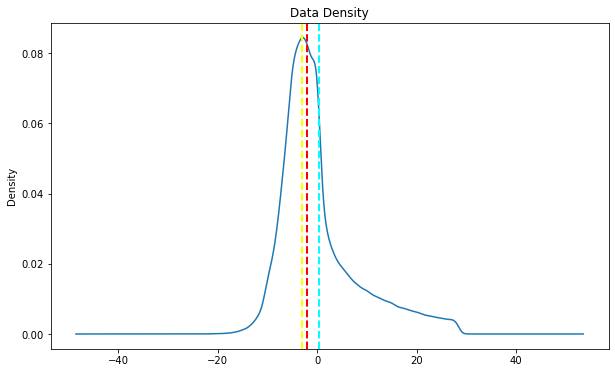

In [27]:
show_density(df_flyt.DepDelay)

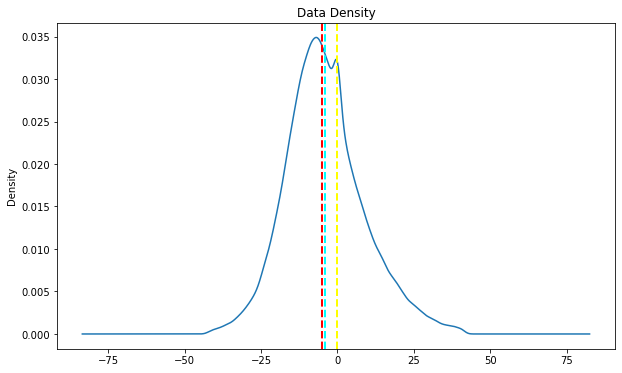

In [28]:
show_density(df_flyt.ArrDelay)

In [29]:
import scipy.stats as sts

In [30]:
sts.kstest(df_flyt.ArrDelay, "norm")

KstestResult(statistic=0.5925209653270264, pvalue=0.0)

In [31]:
df_flyt[["ArrDelay", "DepDelay"]].mean()

ArrDelay   -4.028643
DepDelay    0.372770
dtype: float64

In [32]:
CCarriers = df_flyt[["ArrDelay", "DepDelay"]].groupby(df_flyt.Carrier).mean()

<AxesSubplot:xlabel='Carrier'>

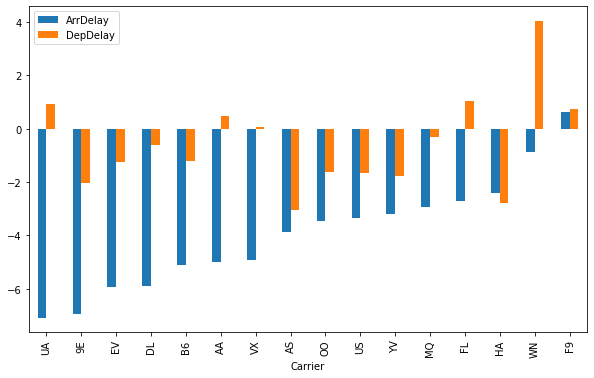

In [33]:
CCarriers.sort_values(by = "ArrDelay").plot(kind = "bar", figsize=(10,6))

In [34]:
DayDelay = df_flyt["ArrDelay"].groupby(df_flyt.DayOfWeek).mean()

<AxesSubplot:xlabel='DayOfWeek'>

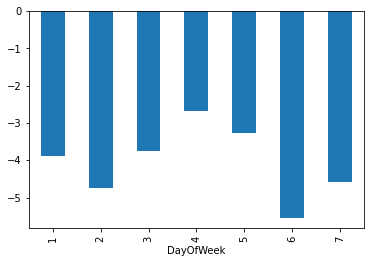

In [36]:
DayDelay.plot(kind = "bar")

In [37]:
AirpDelay = df_flyt["DepDelay"].groupby(df_flyt.OriginAirportName).mean()

In [38]:
AirpDelay.sort_values(ascending= False)

OriginAirportName
Chicago Midway International                            4.990106
Dallas Love Field                                       4.133062
William P Hobby                                         3.730178
Denver International                                    2.792197
Baltimore/Washington International Thurgood Marshall    2.625820
                                                          ...   
Kahului Airport                                        -2.568161
Tucson International                                   -2.580296
Richmond International                                 -2.698537
Ted Stevens Anchorage International                    -2.975783
Long Beach Airport                                     -3.068152
Name: DepDelay, Length: 70, dtype: float64

# Do late departures tend to result in longer arrival delays than on-time departures? (t de student para grupos independientes)

In [61]:
LateDep = df_flyt[(df_flyt.DepDel15 == 1) & (df_flyt.DepDelay > 0) & (df_flyt.ArrDelay > 0)]
LateDep.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
16,2013,10,31,4,MQ,11057,Charlotte Douglas International,Charlotte,NC,12953,LaGuardia,New York,NY,1630,28,1.0,1830,26,1,0
39,2013,10,27,7,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13342,General Mitchell International,Milwaukee,WI,850,17,1.0,935,34,1,0
51,2013,8,12,1,OO,13198,Kansas City International,Kansas City,MO,13930,Chicago O'Hare International,Chicago,IL,1001,16,1.0,1130,15,1,0
87,2013,9,12,4,US,12478,John F. Kennedy International,New York,NY,11057,Charlotte Douglas International,Charlotte,NC,1200,18,1.0,1354,39,1,0
92,2013,7,16,2,WN,10792,Buffalo Niagara International,Buffalo,NY,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1610,18,1.0,1720,14,0,0


In [62]:
NotLate = df_flyt[(df_flyt.DepDel15 == 0) & (df_flyt.Cancelled == 0) & (df_flyt.ArrDelay > 0)]
NotLate.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
15,2013,4,14,7,AA,12892,Los Angeles International,Los Angeles,CA,13830,Kahului Airport,Kahului,HI,1730,-7,0.0,2010,26,1,0
19,2013,6,4,2,US,14107,Phoenix Sky Harbor International,Phoenix,AZ,14057,Portland International,Portland,OR,1020,-5,0.0,1302,1,0,0


In [63]:
sts.shapiro(x = LateDep.ArrDelay)

C:\Users\ibayl\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9743648767471313, pvalue=0.0)

In [64]:
sts.shapiro(x = NotLate.ArrDelay)

ShapiroResult(statistic=0.8537185192108154, pvalue=0.0)

Minimum:1.00
Mean:16.36
Median:15.00
Mode:15.00
Maximum:41.00

Minimum:1.00
Mean:9.09
Median:7.00
Mode:1.00
Maximum:41.00



C:\Users\ibayl\AppData\Local\Temp/ipykernel_14204/3170600929.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ibayl\AppData\Local\Temp/ipykernel_14204/3170600929.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


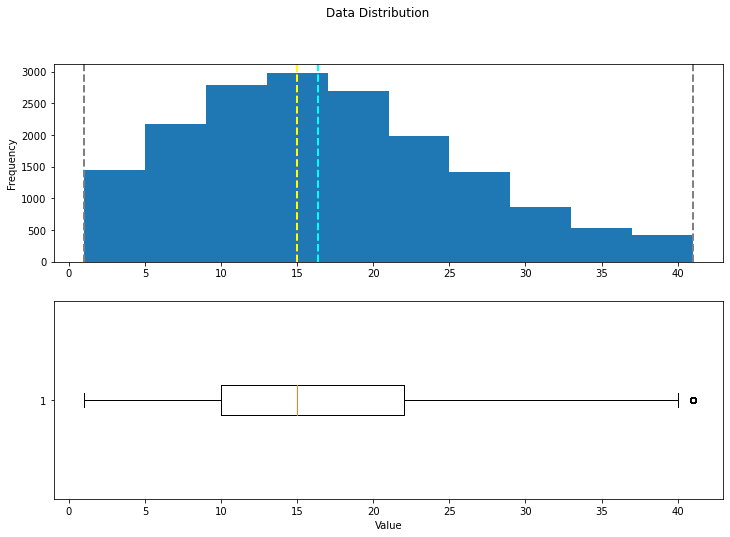

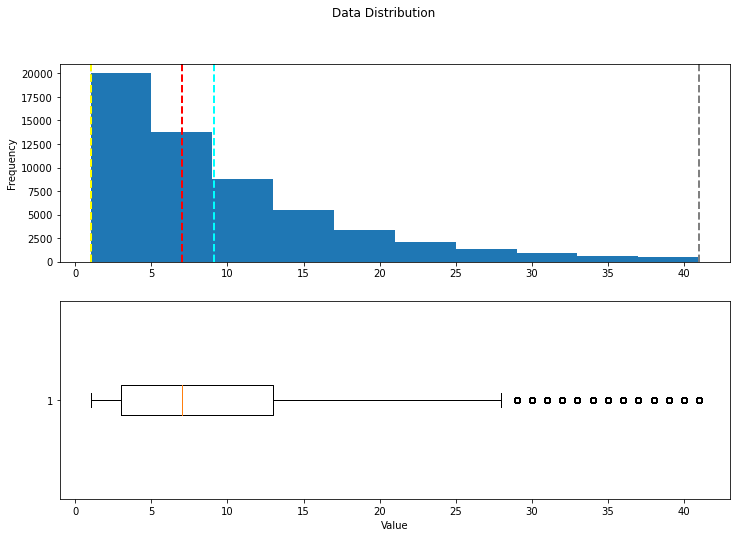

In [65]:
show_distribution(LateDep.ArrDelay)
show_distribution(NotLate.ArrDelay)

In [67]:
sts.mannwhitneyu(NotLate.ArrDelay, LateDep.ArrDelay)

MannwhitneyuResult(statistic=247246375.0, pvalue=0.0)

In [66]:
print(LateDep.ArrDelay.mean())
print(NotLate.ArrDelay.mean())

16.361970283864252
9.09067580630987


# Which route (from origin airport to destination airport) has the most late arrivals?

In [70]:
df_flyc = df_flyt[df_flyt.Cancelled == 0].copy()
df_flyc.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0


In [76]:
df_flyc["Route"] = df_flyc.OriginAirportName + " - "+ df_flyc.DestAirportName

In [77]:
df_flyc.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Route
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,Tampa International - John F. Kennedy Internat...
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0.0,740,22,1,0,Pittsburgh International - Chicago Midway Inte...
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,Seattle/Tacoma International - Ronald Reagan W...
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,Norfolk International - Hartsfield-Jackson Atl...
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0.0,1210,-3,0,0,Metropolitan Oakland International - William P...


In [82]:
df_flyc.ArrDelay.groupby(df_flyc.Route).mean().sort_values(ascending = False)

Route
Louis Armstrong New Orleans International - Ronald Reagan Washington National    25.333333
Cleveland-Hopkins International - Palm Beach International                       18.000000
Denver International - Raleigh-Durham International                              13.826087
Indianapolis International - Philadelphia International                          10.000000
Palm Beach International - Pittsburgh International                              10.000000
                                                                                   ...    
Cleveland-Hopkins International - Will Rogers World                             -21.875000
Eppley Airfield - LaGuardia                                                     -22.200000
Jacksonville International - Chicago Midway International                       -22.727273
Denver International - Kahului Airport                                          -25.500000
Indianapolis International - Logan International                                -26.

In [83]:
df_flyc[df_flyc.ArrDel15 == 1].Route.value_counts()

Los Angeles International - San Francisco International                      82
San Francisco International - Los Angeles International                      82
LaGuardia - Hartsfield-Jackson Atlanta International                         69
Los Angeles International - John F. Kennedy International                    66
McCarran International - Los Angeles International                           63
                                                                             ..
San Diego International - Miami International                                 1
Washington Dulles International - Sacramento International                    1
Luis Munoz Marin International - Jacksonville International                   1
Minneapolis-St Paul International - Raleigh-Durham International              1
Fort Lauderdale-Hollywood International - Washington Dulles International     1
Name: Route, Length: 2224, dtype: int64